In [130]:
# Paqueterias requeridas para el análisis
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [102]:
# Carga de base de datos
all_donations_data = pd.read_excel('../STANFORD_ HIPGive_By_country_2014_2019_JUNUETH.xlsx',sheet_name='All funders data 2014-2019')
new_hip_data_donations = pd.read_excel('../new_hipgive_data_from_august_and_september.xlsx')

In [3]:
all_donations_data.columns

Index([u'Project ID', u'Date (2 horas atrasados)', u'Project Name',
       u'Organization', u'Organization Tax ID', u'Organization Address',
       u'Country', u'Project Goal', u'Transaction ID', u'Payer Name',
       u'Payer Email', u'Total Donation', u'Donation Amount', u'HIPTIP Amount',
       u'HIPGive Fee', u'WePay Payment Amount', u'WePay Fee', u'Match Amount',
       u'Total Channeled to nonprofits',
       u'Total Donation Amount+HIPTIP+HIPGIVE FEE+MATCH', u'Grant per year',
       u'Total DA+HT+HG+MF+G', u'Coupon code', u'Promo code', u'Anonymous',
       u'Message', u' ', u' .1', u' .2', u' .3', u' .4', u' .5', u' .6'],
      dtype='object')

In [103]:
new_hip_data_donations.columns

Index([u'Date (2 horas atrasados)', u'Project Name', u'Organization',
       u'Organization Tax ID', u'Organization Address', u'Country',
       u'Project Goal', u'Transaction ID', u'Payer Name', u'Payer Email',
       u'Total Donation', u'Donation Amount', u'HIPTIP Amount', u'HIPGive Fee',
       u'WePay Payment Amount', u'WePay Fee', u'Match Amount',
       u'Total Channeled to nonprofits',
       u'Total Donation Amount+HIPTIP+HIPGIVE FEE+MATCH', u'Grant per year',
       u'Total DA+HT+HG+MF+G', u'Coupon code', u'Promo code', u'Anonymous',
       u'Message'],
      dtype='object')

In [110]:
donations_data = pd.concat([all_donations_data[[u'Date (2 horas atrasados)']],new_hip_data_donations[[u'Date (2 horas atrasados)']]]) 
donations_data=donations_data.dropna()

In [111]:
type(donations_data)

pandas.core.frame.DataFrame

In [112]:
array_timestamp=donations_data.values

In [113]:
array_timestamp.size

15334

In [114]:
def timestamp_transformation(array_timestamp):
    ts_list=[]
    for ts in array_timestamp:
        pd_timestamp=pd.to_datetime(ts)
        ts_list.append(pd_timestamp)
    return ts_list

In [115]:
def donations_per_year(ts_list):
    ts_2014=[]
    ts_2015=[]
    ts_2016=[]
    ts_2017=[]
    ts_2018=[]
    ts_2019=[]    
   
    for ts in ts_list:
        if ts[0].year==2014:
            ts_2014.append(ts)
        elif ts[0].year==2015:
            ts_2015.append(ts)
        elif ts[0].year==2016:
            ts_2016.append(ts)
        elif ts[0].year==2017:
            ts_2017.append(ts)
        elif ts[0].year==2018:
            ts_2018.append(ts)
        elif ts[0].year==2019:
            ts_2019.append(ts)
    return [ts_2014,ts_2015,ts_2016,ts_2017,ts_2018,ts_2019]

In [116]:
def year_distribution(array_timestamp):
    
    ts_list=timestamp_transformation(array_timestamp)
       
    donations_per_year_list=donations_per_year(ts_list)
    
    year_donations=[len(donations_per_year_list[0]),len(donations_per_year_list[1]),len(donations_per_year_list[2]),len(donations_per_year_list[3]),len(donations_per_year_list[4]),len(donations_per_year_list[5])]
    years=['2014','2015','2016','2017','2018','2019']
    return [years,year_donations]

In [117]:
year_distribution = year_distribution(array_timestamp)

In [118]:
year_distribution

[['2014', '2015', '2016', '2017', '2018', '2019'],
 [2752, 3215, 3163, 2714, 1590, 1900]]

[]

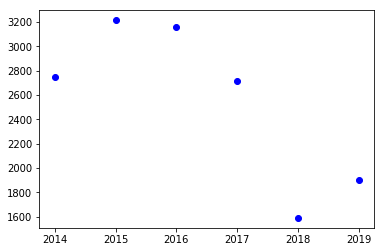

In [131]:
x=year_distribution[0]
y=year_distribution[1]
plt.scatter(x,y,color='blue')
plt.plot()

In [119]:
#year_distribution[0][0],year_distribution[0][1],year_distribution[0][2],year_distribution[0][3],year_distribution[0][4],year_distribution[0][5]
year_distribution[1][0]+year_distribution[1][1]+year_distribution[1][2]+year_distribution[1][3]+year_distribution[1][4]+year_distribution[1][5]

15334

In [120]:
def count(lista):
    index=len(lista)
    counter_lits=[]
    for e in lista:
        counter_lits.append(len(e))
    return counter_lits

def get_month_donations(ts_list):
    ts_january=[]
    ts_february=[]
    ts_march=[]
    ts_april=[]
    ts_may=[]
    ts_june=[]
    ts_july=[]
    ts_august=[]
    ts_septermber=[]
    ts_october=[]
    ts_november=[]
    ts_dicember=[]
    
    for ts in ts_list:        
        if ts.month==1:
            ts_january.append(ts)
        elif ts.month==2:
            ts_february.append(ts)
        elif ts.month==3:
            ts_march.append(ts)
        elif ts.month==4:
            ts_april.append(ts)
        elif ts.month==5:
            ts_may.append(ts)
        elif ts.month==6:
            ts_june.append(ts)
        elif ts.month==7:
            ts_july.append(ts)
        elif ts.month==8:
            ts_august.append(ts)
        elif ts.month==9:
            ts_septermber.append(ts)
        elif ts.month==10:
            ts_october.append(ts)
        elif ts.month==11:
            ts_november.append(ts)
        elif ts.month==12:
            ts_dicember.append(ts)
    return [ts_january,ts_february,ts_march,ts_april,ts_may,ts_june,ts_july,ts_august,ts_septermber,ts_october,ts_november,ts_dicember]


def month_distribution(array_timestamp):
    ts_list=timestamp_transformation(array_timestamp)
    month_d=get_month_donations(ts_list)
    
    months_name=['January','February','March','April','May','June','July','August','September', 'October', 'November', 'Dicember']
    months_number_donation=[len(month_d[0]),len(month_d[1]),len(month_d[2]),len(month_d[3]),len(month_d[4]),len(month_d[5]),len(month_d[6]),len(month_d[7]),len(month_d[8]),len(month_d[9]),len(month_d[10]),len(month_d[11])]
    return [months_name,months_number_donation]




In [121]:
def month_year_distribution(array_timestamp):
    ts_list=timestamp_transformation(array_timestamp)
    year_donations=donations_per_year(ts_list)
    month_donations_2014=count(get_month_donations(year_donations[0]))
    month_donations_2015=count(get_month_donations(year_donations[1]))
    month_donations_2016=count(get_month_donations(year_donations[2]))
    month_donations_2017=count(get_month_donations(year_donations[3]))
    month_donations_2018=count(get_month_donations(year_donations[4]))
    month_donations_2019=count(get_month_donations(year_donations[5]))
    months_name=['January','February','March','April','May','June','July','August','September', 'October', 'November', 'Dicember']
    year_name=['2014','2015','2016','2017','2018','2019']
    month_year_donations=[month_donations_2014,month_donations_2015,month_donations_2016,month_donations_2017,month_donations_2018,month_donations_2019]
    return [months_name,year_name,month_year_donations]

In [122]:
my_distribution=month_year_distribution(array_timestamp)


In [ ]:

25

In [124]:
my_distribution[2][0]

[0, 0, 91, 0, 1641, 0, 0, 0, 0, 614, 406, 0]

In [125]:
my_distribution[2][1]

[0, 51, 68, 81, 63, 692, 322, 151, 313, 305, 161, 1008]

In [126]:
my_distribution[2][2]

[75, 15, 819, 25, 280, 32, 6, 2, 142, 180, 1295, 292]

In [127]:
my_distribution[2][3]

[77, 18, 65, 58, 87, 57, 35, 44, 642, 329, 1070, 232]

In [128]:
my_distribution[2][4]

[27, 11, 18, 12, 18, 150, 289, 91, 14, 29, 736, 195]

In [129]:
my_distribution[2][5]

[21, 18, 595, 44, 66, 99, 1014, 41, 2, 0, 0, 0]